In [8]:
import keras
print(keras.__version__)  #### 此处很重要！！！！

UsageError: Line magic function `%matplot` not found.


# 1.训练MNIST手写数字体

In [3]:
from keras.datasets import mnist

# 加载数据集
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## 训练集信息

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## 测试集信息

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## 搭建网络架构

In [10]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

## 编译步骤

In [11]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


## 数据预处理过程

In [12]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

## 准备标签

In [13]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## 开始执行训练过程

In [17]:
network.fit(train_images, train_labels, epochs=5, batch_size=128);

Epoch 1/5
60000/60000 [==============================] - 9s - loss: 0.0086 - acc: 0.9976     
Epoch 2/5
60000/60000 [==============================] - 9s - loss: 0.0070 - acc: 0.9983     
Epoch 3/5
60000/60000 [==============================] - 9s - loss: 0.0053 - acc: 0.9986     
Epoch 4/5
60000/60000 [==============================] - 9s - loss: 0.0043 - acc: 0.9989     
Epoch 5/5
60000/60000 [==============================] - 10s - loss: 0.0037 - acc: 0.9992    


## 在测试集上应用，检查模型的性能

In [23]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

 9824/10000 [============================>.] - ETA: 0s

In [24]:
print('test_acc:', test_acc)

test_acc: 0.982


# 2.神经网络的数据表示

In [25]:
import numpy as np

In [26]:
# 0D张量即标量
x = np.array(12)
x

array(12)

In [28]:
x.ndim  # 查看一个张量中的轴的个数，张量的维度叫做轴

0

In [31]:
# 1D张量即向量
x = np.array([1, 2, 3, 4])  # 此向量有5个向量，又称为5D向量
x

array([1, 2, 3, 4])

In [32]:
x.ndim

1

In [33]:
# 2D张量即矩阵
x = np.random.randint(10, size=(2, 5))
x

array([[3, 1, 6, 2, 1],
       [5, 9, 7, 8, 6]])

In [34]:
x.ndim

2

In [36]:
# 3D张量
x = np.random.randint(10, size=(3, 3, 3))
x

array([[[3, 9, 7],
        [3, 9, 0],
        [9, 9, 7]],

       [[5, 7, 2],
        [3, 7, 7],
        [3, 6, 2]],

       [[6, 3, 8],
        [7, 8, 8],
        [6, 5, 3]]])

## 关键属性
- 数据类型
- 轴的个数
- 形状

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
# 轴的个数
train_images.ndim

3

In [5]:
# 形状
train_images.shape

(60000, 28, 28)

In [6]:
# 数据类型
train_images.dtype

dtype('uint8')

## 显示具体的某个数字

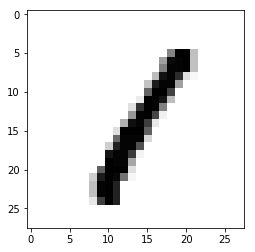

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline
digit = train_images[3]
plt.imshow(digit,cmap=plt.cm.binary);

## 张量切片

In [13]:
my_slice = train_images[10:100]

In [15]:
my_slice.shape

(90, 28, 28)

In [16]:
# 等同于上面的写法
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [22]:
# 等同于上面的写法
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [18]:
my_slice = train_images[:, :14, :14]
my_slice.shape

(60000, 14, 14)

In [20]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

### 深度学习中，张量的第一个轴是样本的数量即样本的维度,也称为批量轴

In [23]:
batch_size = train_images[:128]

In [24]:
batch_size.shape

(128, 28, 28)

In [25]:
batch_size = train_images[128:256]
batch_size.shape

(128, 28, 28)

### 现实中的数据张量
- 向量数据: 2D张量,形状是(样本数,特征数)
- 时间序列数据或序列数据: 3D张量,形状是(样本数,时间序列，特征数)
- 图像数据: 4D张量，形状是(样本数，图像高度，图像宽度，图像的通道数)，tensorflow约定通道在后
- 视频数据: 5D张量，形状是(样本数, 视频帧数，图像高度，图像宽度，图像的通道数)

### 向量数据
- 2D张量（样本轴，特征轴）

### 逐元素运算

In [29]:
def naive_relu(x):
    assert len(x.shape) == 2
    
    x = x.copy()
    for i in range(x_shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [31]:
def naive_add(x,y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x